[Audio Preprocessing](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)<br>
[librosa](https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb)

In [52]:
# audio preprocessing
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [5]:
#mounting
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [7]:
!ls

'My Drive'


In [9]:
!ls 'My Drive'

 2020				   'INTERNSHIP PROJECT-221710309028.gsite'
'CD INTERNAL-2'			   'INTERNSHIP PROJECT.zip'
'CD LAB INTERNAL-2-converted.pdf'  'SUMMER INTERNSHIP'
'Colab Notebooks'		    Untitled0.ipynb
'Getting started.pdf'		   'WT INTERNAL-2'
'INTERNSHIP PROJECT '


In [17]:
!ls 'My Drive/SUMMER INTERNSHIP'

'10-7-2020 , 11-7-2020.ipynb'   9-7-2020.ipynb	     Info.txt
 14-7-2020		        all_stocks_5yr.csv   titanic.csv
 15-7-2020.ipynb	        AudioData	     Untitled0.ipynb
 20-06-2020.ipynb	       'Colab Notebooks'


In [18]:
!ls 'My Drive/SUMMER INTERNSHIP/AudioData'

DC  Info.txt  JE  JK  KL


In [53]:
import os
os.listdir('My Drive/SUMMER INTERNSHIP/AudioData')

['Info.txt', 'JE', 'DC', 'KL', 'JK']

In [54]:
sample_file = 'My Drive/SUMMER INTERNSHIP/AudioData/DC/a01.wav'

In [55]:
data, sampling_rate = librosa.load(sample_file)

In [56]:
data.shape

(80434,)

In [57]:
data[:10]

array([0.03537439, 0.05184603, 0.04569934, 0.04965753, 0.04663509,
       0.04879001, 0.04705136, 0.04866577, 0.04766231, 0.04865323],
      dtype=float32)

In [58]:
print(type(data))

<class 'numpy.ndarray'>


Populating the interactive namespace from numpy and matplotlib


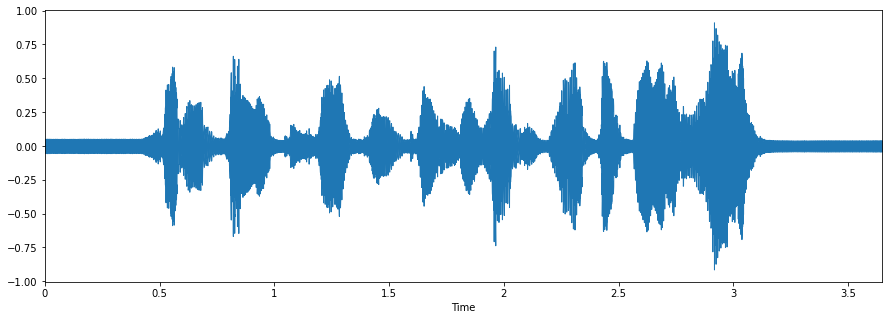

In [59]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [60]:
base_path = 'My Drive/SUMMER INTERNSHIP/AudioData'
folders = [fol  for fol in os.listdir(base_path) if os.path.isdir(base_path+'/'+fol)]
folders

['JE', 'DC', 'KL', 'JK']

In [61]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for cls,per in enumerate(folders):
  print(cls,per)
  for name in os.listdir(base_path+'/'+per):
        X, sample_rate = librosa.load(base_path+'/'+per+'/'+name, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        feature = np.append(feature,cls)
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

0 JE
1 DC
2 KL
3 JK


In [62]:
df.shape

(480, 1)

In [63]:
df.iloc[0][0].shape

(217,)

In [64]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216
45,-23.748592,-23.477313,-23.201062,-23.71716,-24.866948,-24.500246,-24.717987,-26.241764,-24.310605,-18.677279,-13.350149,-8.691108,-7.76233,-9.249946,-12.140405,-13.455601,-15.234362,-13.42532,-11.662603,-10.366176,-9.77049,-9.365436,-9.214626,-8.28305,-8.213719,-7.490833,-7.464036,-6.888051,-6.338921,-9.633187,-14.610095,-17.525532,-18.675514,-21.4141,-22.615935,-24.930519,-26.888277,-26.909517,-14.477511,-7.938904,...,-24.528988,-24.782714,-25.564102,-25.095865,-26.016133,-18.518111,-7.60351,-3.478956,-2.498846,-3.565743,-4.559902,-5.843228,-5.442528,-4.881884,-4.143209,-4.249359,-5.415396,-2.970753,-3.060978,-4.777836,-8.77761,-15.177336,-17.694931,-18.931657,-13.515185,-6.090336,-3.281091,-4.307053,-5.086831,-4.832728,-4.833125,-4.605915,-5.307411,-4.971161,-4.504255,-3.880652,-4.201306,-2.499244,-0.009995,0.0


In [65]:
df2 = df2.dropna()

In [66]:
df2[216].value_counts().sum()

377

In [67]:
df2[216].isnull().sum()

0

In [68]:
df2.shape

(377, 217)

In [69]:
new_df = df2.rename(columns={216: "label"})
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,label
0,3.529949,3.393502,1.581122,0.117455,-2.944852,-3.056374,-1.175403,-2.136643,-4.292749,-5.937324,-8.973770,-12.228952,-6.162340,-2.286926,-1.037475,-1.951216,-2.222021,-1.371666,-1.078009,-0.176724,-0.226750,-1.527521,-1.988343,-4.377648,-6.453167,-9.793393,-13.693820,-16.433676,-18.825826,-18.045779,-14.304377,-4.622837,0.149225,-0.634171,-2.008656,-3.513512,-4.723314,-4.757633,-5.637652,-5.445764,...,-26.520170,-24.762242,-23.020624,-18.458028,-13.908728,-10.333147,-7.374277,-6.486392,-6.859358,-7.239401,-6.605263,-8.052280,-9.013007,-8.072264,-6.643629,-6.462305,-6.937569,-9.000449,-10.025121,-8.818044,-9.844581,-10.489114,-10.257322,-9.158682,-8.059568,-8.446144,-8.687167,-8.110723,-7.476902,-7.376308,-7.628752,-6.795522,-6.259950,-5.866019,-5.707147,-5.065527,-4.295856,2.169405,7.545353,0.0
1,-24.170094,-24.094661,-9.601142,-3.714322,0.797293,1.858434,-1.265900,-3.732545,-4.196689,-5.403189,-5.124485,-5.469441,-8.698426,-12.781067,-10.162155,-8.299360,-4.959671,-3.070056,-3.430014,-5.201535,-4.622440,-2.491305,-1.452581,-3.860088,-6.562961,-7.930981,-6.321495,-5.292420,-5.257919,-5.137785,-5.269797,-5.619560,-3.867031,-2.934800,-2.913081,-5.081114,-10.583761,-14.018868,-16.256629,-17.175667,...,-24.460299,-23.765543,-24.569724,-25.877028,-26.477489,-26.631025,-28.372223,-26.997070,-26.283700,-27.126463,-26.104533,-27.481027,-27.492673,-25.431814,-25.381361,-24.917548,-23.053988,-22.077476,-21.619407,-21.848994,-20.785571,-20.997079,-24.328142,-24.275333,-25.353506,-22.977321,-23.786736,-24.796406,-24.237703,-22.844766,-23.453355,-26.091680,-24.624404,-23.409434,-23.891389,-23.145431,-23.774141,-24.094874,-22.963107,0.0
3,-25.458699,-25.307367,-26.562066,-25.635848,-24.413176,-24.330746,-25.231881,-24.310298,-24.332099,-20.944345,-15.979261,-5.539458,-1.756211,-0.161437,-0.274833,-2.412469,-5.660424,-8.970177,-10.744764,-12.576181,-12.843405,-13.609522,-13.780352,-14.411007,-13.463338,-10.353508,-8.922226,-9.859529,-6.433242,-4.854305,-8.181603,-11.434088,-11.670716,-8.565809,-7.373743,-7.185267,-4.975200,-3.933481,-3.654960,-4.448780,...,0.367393,-0.158724,-0.616696,-1.267337,-2.047972,-2.826475,-4.094759,-5.985270,-8.207567,-9.457543,-10.795895,-11.896204,-11.147610,-11.859442,-17.699827,-20.339299,-21.564096,-22.112553,-22.755406,-24.880546,-25.788028,-26.505943,-26.111740,-26.400599,-27.348649,-27.729517,-28.141801,-26.481350,-27.682820,-28.726685,-27.912122,-28.625142,-27.510296,-26.547950,-26.880675,-25.819318,-27.104844,-27.745132,-25.859411,0.0
4,-25.082708,-25.211529,-10.960526,-2.494657,-0.711743,-0.107495,1.349230,2.382443,2.559838,-1.681059,-7.731854,-13.696166,-13.500442,-13.598779,-14.571177,-15.117069,-18.433275,-20.404400,-20.638127,-21.622236,-23.330882,-23.508355,-21.635039,-21.065160,-12.081862,-5.228182,-1.319949,-1.447118,-5.244732,-5.935609,-3.983313,-4.677837,-6.355636,-4.663865,-0.224138,2.877790,0.539785,-5.361162,-5.508417,-3.996268,...,-0.702761,-1.914688,-2.737974,-0.978604,-0.945886,-0.462286,-0.192789,-0.918264,-3.140287,-4.228290,-5.543325,-7.504154,-9.443468,-15.092895,-18.300844,-20.470281,-22.440068,-23.762655,-24.293551,-24.787956,-24.515277,-24.634491,-26.463796,-28.088424,-26.549329,-25.644560,-26.490921,-26.936973,-25.805706,-25.769703,-25.222925,-22.785147,-23.360131,-22.886477,-21.424888,-22.595119,-23.384199,-23.606464,-25.523274,0.0
5,-23.049968,-24.298283,-24.185276,-24.487664,-25.568799,-25.687105,-26.123712,-24.602636,-25.202267,-26.601837,-26.052129,-25.760680,-23.779370,-24.826245,-21.656409,-10.903756,-4.612804,-0.905796,-0.489042,-3.510225,-4.843920,-4.776575,-3.896817,-1.118703,1.415768,3.258394,3.865701,2.837688,1.499175,-0.194277,-0.042299,1.628584,1.758420,1.480264,0.018137,-0.757888,-4.692052,-7.7

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('label',axis=1),new_df['label'],random_state=5)
print(X_train.shape)

(282, 216)


In [71]:
y_train.value_counts(normalize=True)

0.0    0.283688
3.0    0.262411
1.0    0.255319
2.0    0.198582
Name: label, dtype: float64

In [72]:
y_test.value_counts(normalize=True)

3.0    0.315789
0.0    0.294737
1.0    0.242105
2.0    0.147368
Name: label, dtype: float64

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
from sklearn.metrics import accuracy_score
y_train_pred = knn.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.6347517730496454

In [87]:
#testing
from sklearn.metrics import accuracy_score
y_test_pred = knn.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.5052631578947369

ANN

In [88]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [89]:
y_train_cat

array([[[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       ...,

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]], dtype=float32)

In [90]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [91]:
#building the model
model_ann = Sequential()
model_ann.add(Dense(512,input_shape=(216,),activation='relu'))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(4,activation='softmax'))
model_ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               111104    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 144,196
Trainable params: 144,196
Non-trainable params: 0
_________________________________________________________________


In [92]:
#compiling the model
model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
#train the model
model_ann.fit(X_train,y_train_cat,epochs=20,validation_data=(X_test,y_test_cat))

ValueError: ignored

CNN

In [95]:
X_train.shape

(282, 216)

In [96]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [97]:
x_traincnn.shape

(282, 216, 1)

In [98]:
#build the model
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_5 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_6 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 27, 128)          

In [99]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [100]:
cnnhistory=model.fit(x_traincnn, y_train_cat, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test_cat))

ValueError: ignored